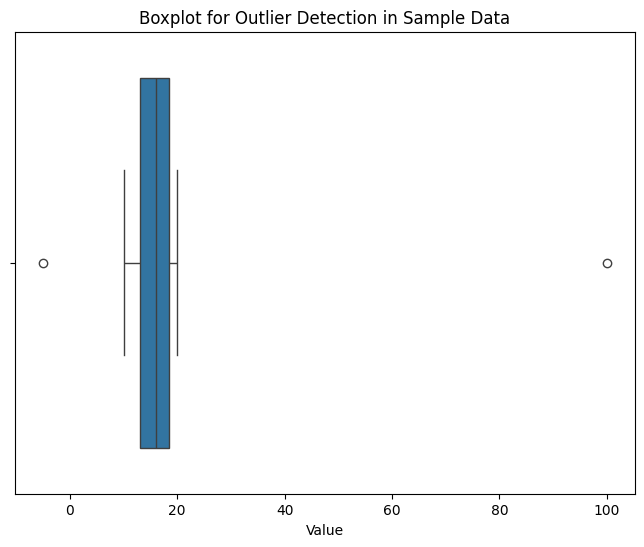

Outliers detected by Z-score method: [100]
Outliers detected by IQR method: [100, -5]


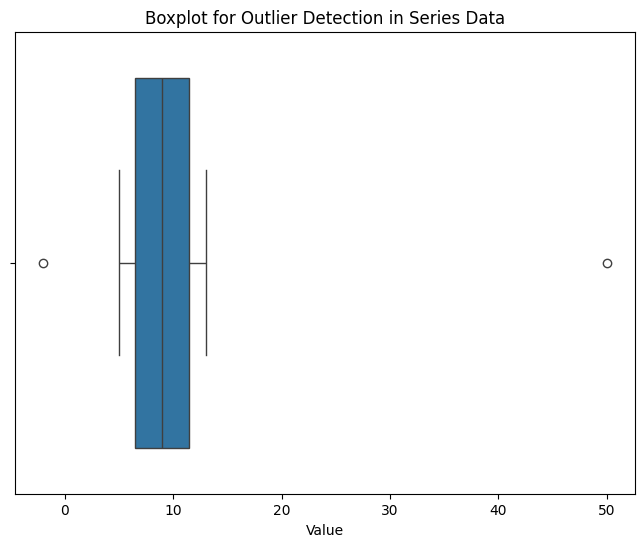

Outliers detected by Z-score method: [50]
Outliers detected by IQR method: [50, -2]


In [2]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std_dev = np.std(data)
    outliers_zscore = [x for x in data if (x - mean) / std_dev > threshold or (x - mean) / std_dev < -threshold]
    return outliers_zscore

def detect_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_iqr = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers_iqr

def visualize_outliers_boxplot(data, column_name="Data"):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data)
    plt.title(f"Boxplot for Outlier Detection in {column_name}")
    plt.xlabel("Value")
    plt.show()

def combine_outlier_detection(data, column_name="Data"):
    """
    Combines Z-score, IQR, and Boxplot visualization to detect outliers.

    Args:
        data (list or pandas.Series): The dataset to analyze.
        column_name (str, optional): The name of the data column. Defaults to "Data".

    Returns:
        tuple: A tuple containing lists of outliers detected by Z-score and IQR.
    """
    if isinstance(data, pd.Series):
        data_list = data.tolist()
    else:
        data_list = data

    outliers_z = detect_outliers_zscore(data_list)
    outliers_iqr_detected = detect_outliers_iqr(data_list)
    visualize_outliers_boxplot(data, column_name)

    print(f"Outliers detected by Z-score method: {outliers_z}")
    print(f"Outliers detected by IQR method: {outliers_iqr_detected}")

    return outliers_z, outliers_iqr_detected

if __name__ == '__main__':
    dataset = [10, 12, 14, 15, 16, 17, 18, 19, 20, 100, -5]
    combine_outlier_detection(dataset, "Sample Data")

    data_series = pd.Series([5, 6, 7, 8, 9, 10, 11, 12, 13, 50, -2])
    combine_outlier_detection(data_series, "Series Data")
